## Michigan Football K Means Analysis

##### The goal of this analysis is to group similarly performing players from the 2021 Michigan Football Team into clusters. We read in a simple dataset with only two data points: Rushing Yards and Passing Yards. This workbook will explore the advantages of normalizing the data, swapping in a different number of clusters, and see what happens when we try plotting a 3rd variable.

##### Chris McAllister - January 2022

In [1]:
# Import Libraries:
import pandas as pd
import numpy as np
import re 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Import Roster Data

In [2]:
# Data Source: 'https://www.sports-reference.com/cfb/schools/michigan/2021-roster.html'

# Read in roster data
roster_df = pd.read_html('https://www.sports-reference.com/cfb/schools/michigan/2021-roster.html')
roster_df = pd.DataFrame(roster_df[0])


roster_df = roster_df[['Player', 'Class', 'Pos']]
roster_df = roster_df[roster_df['Player'] != 'Player']

roster_df.head()

,Player,Class,Pos
0,Cade McNamara,JR,QB
1,J.J. McCarthy,FR,QB
2,Alan Bowman,SR,QB
3,Dan Villari,SO,QB
4,Jesse Madden,FR,QB


### Import Player Rushing Yards and Receiving Yards

In [3]:
stats_df = pd.read_csv('2021_Umich_Player_Stats.csv')

stats_df = stats_df[['Player', 'Ru Yds', 'Re Yds']]
stats_df.fillna(0, inplace = True) # Fill n/a with 0's
stats_df.head()

,Player,Ru Yds,Re Yds
0,Hassan Haskins,1327.0,131.0
1,Blake Corum,949.0,141.0
2,Cade McNamara,26.0,0.0
3,Donovan Edwards,174.0,265.0
4,J.J. McCarthy,124.0,0.0


### Join player roster data with the stat data 

##### We can use this to filter out the stats of known non-skill position players who touched the ball. Like a linebacker who ran a fake punt for 15 yards.

In [4]:
df_final = pd.merge(left = stats_df, right = roster_df, how = 'left', on = 'Player')

#only include RBs, WRs, TEs
df_final = df_final[df_final['Pos'].isin(['RB', 'WR', 'TE'])]
df_final.reset_index(inplace = True)

df_final_2 = df_final[['Ru Yds', 'Re Yds']]

### Preview of final dataframe before normalization and clustering

In [5]:
df_final_2.head()

,Ru Yds,Re Yds
0,1327.0,131.0
1,949.0,141.0
2,174.0,265.0
3,162.0,79.0
4,33.0,0.0


#### Choose dataframe and number of clusters

In [6]:
# For easier entry in the future:

# dataframe 
df = df_final_2

#number of clusters
k = 4

Scale data to z-score

In [7]:
## Feature Scaling
sc_dfa = StandardScaler()

# normalize the data to z-score scaling
dfa_std = sc_dfa.fit_transform(df.astype(float))

##### Preview Normalized Data

In [8]:
pd.DataFrame(dfa_std).head()

,0,1
0,3.567311,-0.123048
1,2.436563,-0.065753
2,0.118231,0.644706
3,0.082335,-0.420982
4,-0.303555,-0.873613


Assign cluster number to each record. In this case, each record is one player

In [9]:
## Clustering with KMeans
## Assign a cluster to each player
kmeans = KMeans(n_clusters=k, random_state=38).fit(dfa_std)
labels = kmeans.labels_

In [10]:
new_dfa = pd.DataFrame(data = dfa_std, columns = ['Ru Yds', 'Re Yds'])
new_dfa['label_kmeans'] = labels

### Plot data broken out by cluster

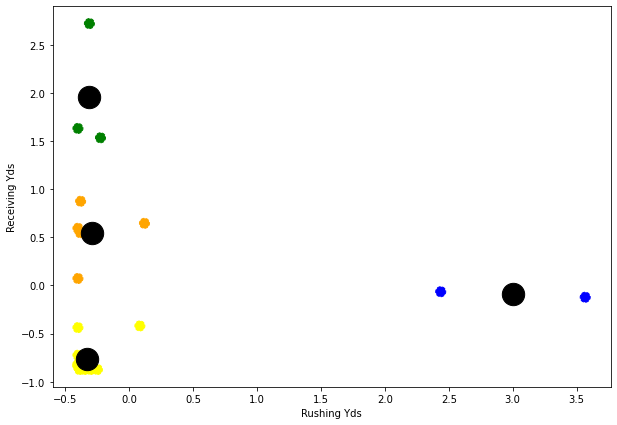

In [11]:
fig, ax = plt.subplots(figsize=(10,7))

plt.scatter(new_dfa["Ru Yds"][new_dfa["label_kmeans"] == 0], new_dfa["Re Yds"][new_dfa["label_kmeans"] == 0], 
            color = "blue", s=100, edgecolor='blue',linestyle='--')

plt.scatter(new_dfa["Ru Yds"][new_dfa["label_kmeans"] == 1], new_dfa["Re Yds"][new_dfa["label_kmeans"] == 1], 
            color = "yellow", s=100, edgecolor='yellow',linestyle='--')

plt.scatter(new_dfa["Ru Yds"][new_dfa["label_kmeans"] == 2], new_dfa["Re Yds"][new_dfa["label_kmeans"] == 2], 
            color = "green", s=100, edgecolor='green',linestyle='--')

plt.scatter(new_dfa["Ru Yds"][new_dfa["label_kmeans"] == 3], new_dfa["Re Yds"][new_dfa["label_kmeans"] == 3], 
            color = "orange", s=100, edgecolor='orange',linestyle='--')



centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);

ax.set_xlabel('Rushing Yds')
ax.set_ylabel('Receiving Yds')

plt.show()

### Plot with Data Labels for the Players

In [12]:
df_plot = df_final.join(new_dfa, lsuffix = '_left', rsuffix = '_right')

#df_plot

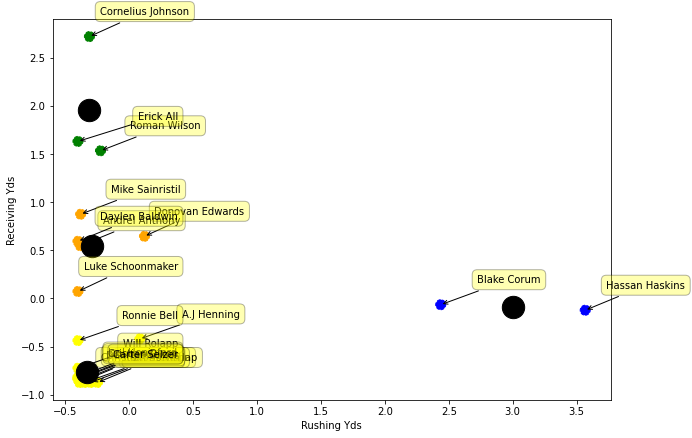

In [13]:
fig, ax = plt.subplots(figsize=(10,7))

plt.scatter(df_plot["Ru Yds_right"][df_plot["label_kmeans"] == 0], df_plot["Re Yds_right"][df_plot["label_kmeans"] == 0], 
            color = "blue", s=100, edgecolor='blue',linestyle='--')

plt.scatter(df_plot["Ru Yds_right"][df_plot["label_kmeans"] == 1], df_plot["Re Yds_right"][df_plot["label_kmeans"] == 1], 
            color = "yellow", s=100, edgecolor='yellow',linestyle='--')

plt.scatter(df_plot["Ru Yds_right"][df_plot["label_kmeans"] == 2], df_plot["Re Yds_right"][df_plot["label_kmeans"] == 2], 
            color = "green", s=100, edgecolor='green',linestyle='--')

plt.scatter(df_plot["Ru Yds_right"][df_plot["label_kmeans"] == 3], df_plot["Re Yds_right"][df_plot["label_kmeans"] == 3], 
            color = "orange", s=100, edgecolor='orange',linestyle='--')


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);

ax.set_xlabel('Rushing Yds')
ax.set_ylabel('Receiving Yds')

#for i, txt in enumerate(df_plot['Player']):
    #ax.annotate(txt, (df_plot['Ru Yds_left'][i], df_plot['Ru Yds_left'][i]))

N = len(df_plot)
data = df_plot
labels = df_plot['Player']    

for label, x, y in zip(labels, data['Ru Yds_right'], data['Re Yds_right']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(100, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
plt.show()

### Distribution of Rushing Yards by Player

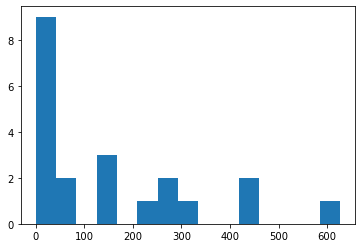

In [14]:
plt.hist(df_plot['Re Yds_left'], bins = 15);

### Distribution of Rushing Yards by Player

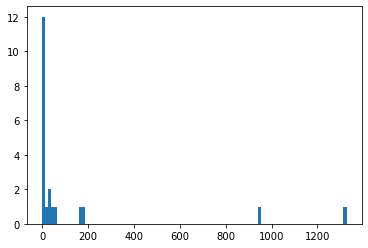

In [15]:
plt.hist(df_plot['Ru Yds_left'], bins = 100);

### Appendix - Other Number of Clusters

In [16]:
# For easier entry in the future:

# dataframe 
df = df_final_2

#number of clusters
k = 2

In [17]:
## Feature Scaling
sc_dfa = StandardScaler()

# normalize the data to z-score scaling
dfa_std = sc_dfa.fit_transform(df.astype(float))

In [18]:
## Clustering with KMeans
## Assign a cluster to each player
kmeans = KMeans(n_clusters=k, random_state=38).fit(dfa_std)
labels = kmeans.labels_

In [19]:
new_dfa = pd.DataFrame(data = dfa_std, columns = ['Ru Yds', 'Re Yds'])
new_dfa['label_kmeans'] = labels

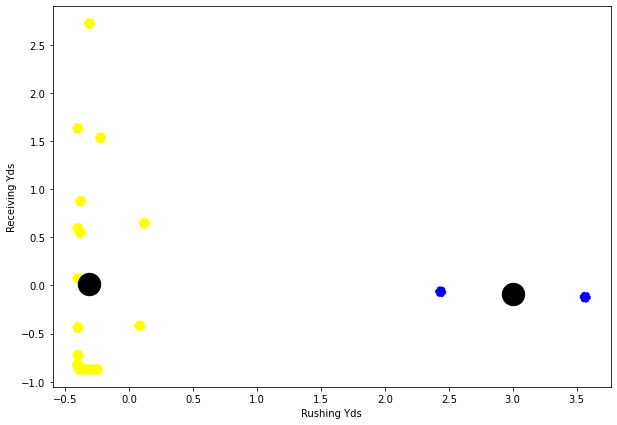

In [20]:
fig, ax = plt.subplots(figsize=(10,7))

plt.scatter(new_dfa["Ru Yds"][new_dfa["label_kmeans"] == 0], new_dfa["Re Yds"][new_dfa["label_kmeans"] == 0], 
            color = "blue", s=100, edgecolor='blue',linestyle='--')

plt.scatter(new_dfa["Ru Yds"][new_dfa["label_kmeans"] == 1], new_dfa["Re Yds"][new_dfa["label_kmeans"] == 1], 
            color = "yellow", s=100, edgecolor='yellow',linestyle='--')




centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);

ax.set_xlabel('Rushing Yds')
ax.set_ylabel('Receiving Yds')

plt.show()

##### The two blue dots on the right (Hassan Haskins and Blake Corum) ran the ball so much more than everyone else, that they almost always belong in their own cluster. 

##### To increase the insights we can glean from this analysis, we had to add more clusters to differentiate the skill players other than Haskins and Corum.

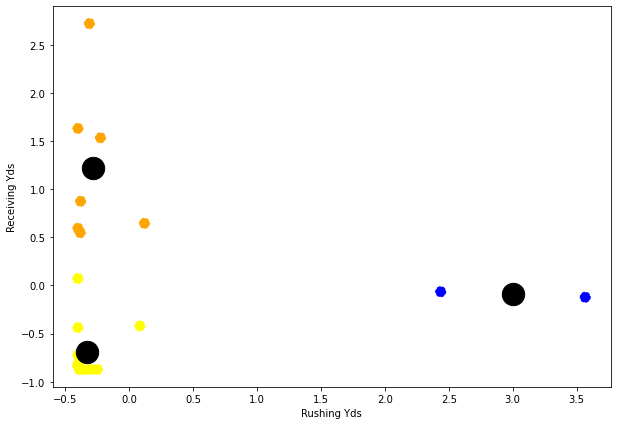

In [21]:
# For easier entry in the future:

# dataframe 
df = df_final_2

#number of clusters
k = 3

## Feature Scaling
sc_dfa = StandardScaler()

# normalize the data to z-score scaling
dfa_std = sc_dfa.fit_transform(df.astype(float))

## Clustering with KMeans
## Assign a cluster to each player
kmeans = KMeans(n_clusters=k, random_state=38).fit(dfa_std)
labels = kmeans.labels_

new_dfa = pd.DataFrame(data = dfa_std, columns = ['Ru Yds', 'Re Yds'])
new_dfa['label_kmeans'] = labels

#Plot
fig, ax = plt.subplots(figsize=(10,7))

plt.scatter(new_dfa["Ru Yds"][new_dfa["label_kmeans"] == 0], new_dfa["Re Yds"][new_dfa["label_kmeans"] == 0], 
            color = "blue", s=100, edgecolor='blue',linestyle='--')

plt.scatter(new_dfa["Ru Yds"][new_dfa["label_kmeans"] == 1], new_dfa["Re Yds"][new_dfa["label_kmeans"] == 1], 
            color = "yellow", s=100, edgecolor='yellow',linestyle='--')

plt.scatter(new_dfa["Ru Yds"][new_dfa["label_kmeans"] == 2], new_dfa["Re Yds"][new_dfa["label_kmeans"] == 2], 
            color = "orange", s=100, edgecolor='orange',linestyle='--')




centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);

ax.set_xlabel('Rushing Yds')
ax.set_ylabel('Receiving Yds')

plt.show()

##### Three clusters is definitely more descriptive than two. But I don't think it makes sense to have our top 3 best receivers, who signficantly outperformed everyone else, in the same group as the middle of the road receivers.  

##### That's why we chose 4 clusters: high performing rushers (blue), high performing receivers (green), middle of the road receivers (orange), and bench players (yellow). 

##### See below:

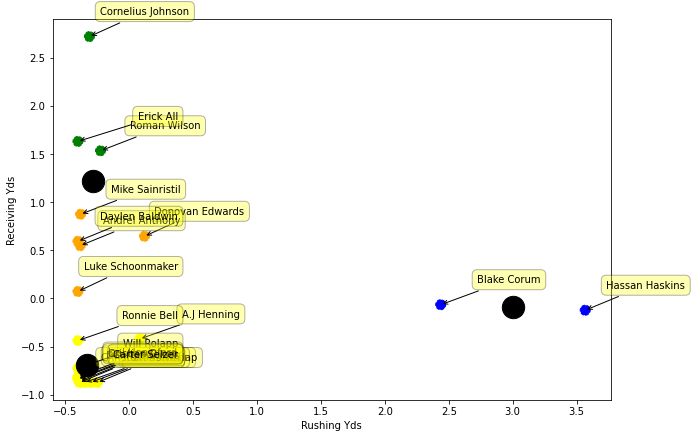

In [22]:
k = 4

fig, ax = plt.subplots(figsize=(10,7))

plt.scatter(df_plot["Ru Yds_right"][df_plot["label_kmeans"] == 0], df_plot["Re Yds_right"][df_plot["label_kmeans"] == 0], 
            color = "blue", s=100, edgecolor='blue',linestyle='--')

plt.scatter(df_plot["Ru Yds_right"][df_plot["label_kmeans"] == 1], df_plot["Re Yds_right"][df_plot["label_kmeans"] == 1], 
            color = "yellow", s=100, edgecolor='yellow',linestyle='--')

plt.scatter(df_plot["Ru Yds_right"][df_plot["label_kmeans"] == 2], df_plot["Re Yds_right"][df_plot["label_kmeans"] == 2], 
            color = "green", s=100, edgecolor='green',linestyle='--')

plt.scatter(df_plot["Ru Yds_right"][df_plot["label_kmeans"] == 3], df_plot["Re Yds_right"][df_plot["label_kmeans"] == 3], 
            color = "orange", s=100, edgecolor='orange',linestyle='--')


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);

ax.set_xlabel('Rushing Yds')
ax.set_ylabel('Receiving Yds')

#for i, txt in enumerate(df_plot['Player']):
    #ax.annotate(txt, (df_plot['Ru Yds_left'][i], df_plot['Ru Yds_left'][i]))

N = len(df_plot)
data = df_plot
labels = df_plot['Player']    

for label, x, y in zip(labels, data['Ru Yds_right'], data['Re Yds_right']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(100, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
plt.show()